Somos uma ong de animais e queremos incentivar a adoção de pets. Para isso, vamos mostrar um vídeo de animais para as pessoas.
Porém, não sabemos o que é mais efetivo: um vídeo de cachorros ou um vídeo de gatos.

Por isso, resolvemos rodar um experimento: vamos criar 2 vídeos, um de cachorro e outro de gato. Depois, vamos perguntar as pessoas a probabilidade de que ela adote um animal.

*As pessoas desse experimento só verão 1 vídeo cada

*Ao final do vídeo perguntamos a elas a probabilidade de que elas adotem um animal

*As amostras são aleatorias e sem viéses sistematicos

Objetivo:
Avaliar qual animal (cachorro ou gato) deve estar
em um vídeo de campanha de adoção

Experimento:
500 pessoas que não possuem animais de estimação assistem aos vídeos
de campanha de adoção. Os vídeos são idênticos com exceção dos animais
mostrados:

- 250 pessoas aleatorizadas para o vídeo com gato
- 250 pessoas aleatorizadas para o vídeo com cachorro

Resposta:
"Qual a chance de adotar um pet? (0-100)" depois do vídeo

A média de probabilidade de quem ve o vídeo de gato é igual a de cachorro?


# Carregamento das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Análise descritiva do dataframe

In [2]:
#lendo o arquivo csv
df = pd.read_csv("cachorro_gato.csv")

A coluna grupo é se a pessoa viu o video de cachorro ou de gato. 0 é cachorro e 1 é gato

Escore é probabilidade da pessoa adotar um pet após ver o vídeo

In [3]:
df

,Unnamed: 0,grupo,escore
0,0,1,59.853433
1,1,0,66.353529
2,2,1,56.495813
3,3,0,67.995090
4,4,1,70.434375
...,...,...,...
495,495,0,70.292458
496,496,0,74.674293
497,497,1,43.148814
498,498,0,58.625388


In [5]:
df.groupby(['grupo'])["escore"].describe()

,count,mean,std,min,25%,50%,75%,max
grupo,,,,,,,,
0,253.0,55.531922,14.665402,16.304739,44.488055,55.802372,66.249013,95.309459
1,247.0,56.744495,14.913287,14.654955,48.682432,56.924405,66.817326,93.259671


Vemos aqui que a média e mediana de quem viu um vídeo de gato é ligeiramente maior do que quem viu vídeo de cahcorro


### Histograma por grupo

Mostrando como está a distribuição de cada um dos grupos

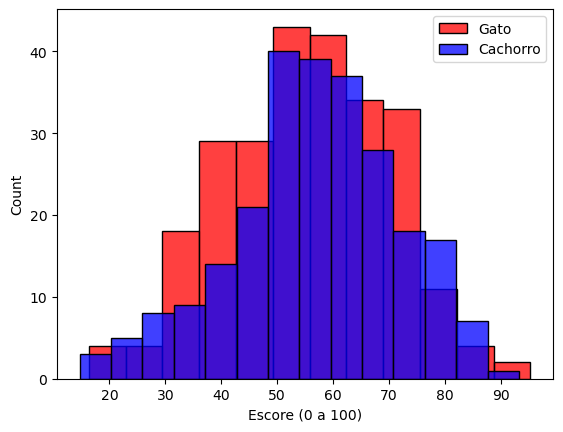

In [6]:
sns.histplot(df[df['grupo'] == 0]['escore'],label = 'Gato', color = "red") #histograma grupo que viu o video de gato
sns.histplot(df[df['grupo'] == 1]['escore'], label = 'Cachorro', color="blue")  #histograma grupo que viu o video de cachorro
plt.xlabel('Escore (0 a 100)')
plt.legend()
plt.show()

O histograma acima mostra que as distribuições são muito semelhantes. Como ambas seguem aproximadamente uma normal, vamos fazer um teste de hipótese para ver qual média é maior

O teste de hipótese escolhido deve ser para média, com 2 amostras independentes (quem viu vídeo de cachorro só viu cachorro e quem viu video de gato só viu de gato).
Como não temos o desvio-padrão da população, podemos usar o teste t

# Comparação entre os grupos por teste-t independente

Vamos comparar as médias dos escores dos dois grupos. São estatisticamente diferentes?

In [4]:
from scipy.stats import ttest_ind
# Importando a função que realiza o teste-t para amostras independentes

In [5]:
# a função retorna uma tupla. O primeiro valor é o valor do t e o segundo é o p-value
ttest_ind(df[df['grupo'] == 0]['escore'], df[df['grupo'] == 1]['escore'], equal_var = True)  

TtestResult(statistic=-0.9166663411409343, pvalue=0.35976119585131083, df=498.0)

In [6]:
#organizando a tupla para denominar cada um dos valores
t, pvalue = ttest_ind(df[df['grupo'] == 0]['escore'], df[df['grupo'] == 1]['escore'])

In [7]:
print('stat=%.3f, p=%.3f' % (t, pvalue))

stat=-0.917, p=0.360


O nosso p-valor aqui foi de aproximadamente 0.36.

Estabelecendo o nível de significância como 5%, como p > 0,05, podemos aceitar a hipótese nula. Logo, estatatisticamente as médias são iguais
